In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import PIL.Image as Image
import cv2

# Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#For visualization the model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Os
import os
import numpy as np
import pathlib
import pandas as pd

In [2]:
data_dir = "D:/Dataset/CatnRabit/train-cat-rabbit"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Path-to-dataset/train-cat-rabbit')

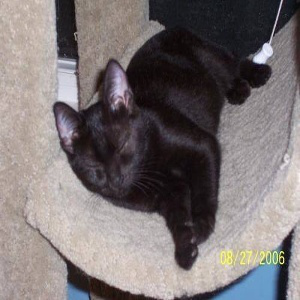

In [3]:
cats = list(data_dir.glob('cat/*'))
Image.open(str(cats[13]))

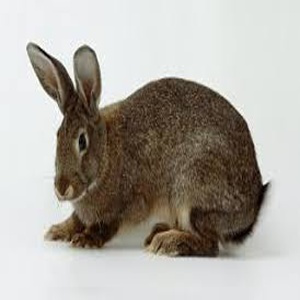

In [4]:
rabbits = list(data_dir.glob('rabbit/*'))
Image.open(str(rabbits[91]))

In [5]:
df_images = {
    'cats' : cats,
    'rabbits' : rabbits
}
df_labels = {
    'cats' : 0,
    'rabbits' : 1,
}

In [6]:
img = cv2.imread(str(df_images['rabbits'][2]))
img.shape
len(df_labels)

2

In [7]:
X, y = [], [] # X = images, y = labels

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images
        X.append(resized_img) 
        y.append(df_labels[label])

In [8]:
X = np.array(X)
X = X/255
y = np.array(y)

In [9]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1200, 224, 224, 3)
(300, 224, 224, 3)
(1200,)
(300,)


In [11]:
img_shape = resized_img.shape
num_classes = len(df_labels)


In [12]:
def create_model(input_shape, num_classes) :
    model = Sequential([
        # First Convolution (Hidden Layer)
        Conv2D(32, (5,5), activation='relu',
               input_shape = input_shape,
               kernel_regularizer=l2(0.0001),
               padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        # Second Convolution (Hidden Layer)
        Conv2D(64, (3,3), activation='relu',
               kernel_regularizer=l2(0.0001),
               padding='same'),
        MaxPooling2D((2,2)),
        # Third Convolution (Hidden Layer)
        Conv2D(128, (3,3), activation='relu',
               kernel_regularizer=l2(0.0001),
               padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        # Fourth Convolution (Hidden Layer)
        Conv2D(256, (3,3), activation='relu',
               kernel_regularizer=l2(0.0001),
               padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        
        # Flatten and Dense
        Flatten(),
        # First Dense with Dropout for Regularization
        Dense(512, activation='relu',
              kernel_regularizer=l2(0.0001)),
        Dropout(0.6),
        # Output Layer
        Dense(num_classes, activation = 'softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy'])
    return model

In [13]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [14]:
model = create_model(resized_img.shape, len(df_labels)) 
model.summary()

D:\Lib\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,083,266 (99.50 MB)

 Trainable params: 26,082,434 (99.50 MB)

 Non-trainable params: 832 (3.25 KB)

In [15]:
def train_model(X_train, y_train, X_val, y_val, img_shape, num_classes) :
    model = create_model(img_shape, num_classes)
    # Early Stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',   
        patience=10,   
        restore_best_weights=True 
    )
    # Adaptive Learning Rate
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5,     
        patience=3,   
        min_lr=1e-6
    )
    # Model Checkpointing
    model_checkpoint = ModelCheckpoint(
        'best_model.keras',  
        monitor='val_accuracy',
        save_best_only=True 
    )
    #Model Training
    history = model.fit(
        X_train, y_train, 
        epochs=50,  
        validation_data=(X_val, y_val),
        callbacks=[
            early_stopping, 
            reduce_lr,      
            model_checkpoint 
        ],
        batch_size=32  
    )
    return model
model = train_model(X_train, y_train, X_val, y_val, img_shape, num_classes)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.6930 - loss: 7.8105 - val_accuracy: 0.4500 - val_loss: 3.9758 - learning_rate: 5.0000e-04
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8357 - loss: 1.5044 - val_accuracy: 0.4500 - val_loss: 5.3022 - learning_rate: 5.0000e-04
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8488 - loss: 0.7175 - val_accuracy: 0.5400 - val_loss: 1.9444 - learning_rate: 5.0000e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9005 - loss: 0.5431 - val_accuracy: 0.5800 - val_loss: 3.0288 - learning_rate: 5.0000e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9140 - loss: 0.3951 - val_accuracy: 0.5500 - val_loss: 4.4650 - learning_rate: 5.0000e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9204 - loss: 0.3922 - val_accuracy: 0.6100 - val_loss: 3.7182 - learning_rate: 5.0000e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9344 - loss:

In [16]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.9552 - loss: 0.3484


[0.3296372592449188, 0.9566666483879089]

In [35]:
image = load_img("D:/Dataset/CatnRabit/show-images/img-10.jpg", target_size=(224, 224))
image_array = img_to_array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Predict with your model
predicted_probabilities = model.predict(image_array)[0]
predicted_class = np.argmax(predicted_probabilities)
classes = ['Cat', 'Rabbit']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


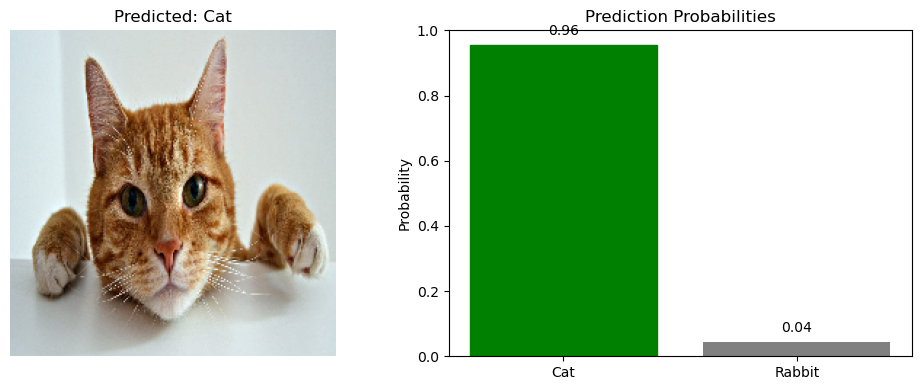

In [36]:
# Create the visualization
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Display the image
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image)
ax1.axis('off')
ax1.set_title(f'Predicted: {classes[predicted_class]}')

# Subplot 2: Bar chart for probabilities
ax2 = fig.add_subplot(1, 2, 2)
bars = ax2.bar(classes, predicted_probabilities, color=['gray', 'gray'])
bars[predicted_class].set_color('green')  # Highlight the predicted class in green
ax2.set_ylim(0, 1)
ax2.set_ylabel('Probability')
ax2.set_title('Prediction Probabilities')

# Add probability values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{predicted_probabilities[i]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


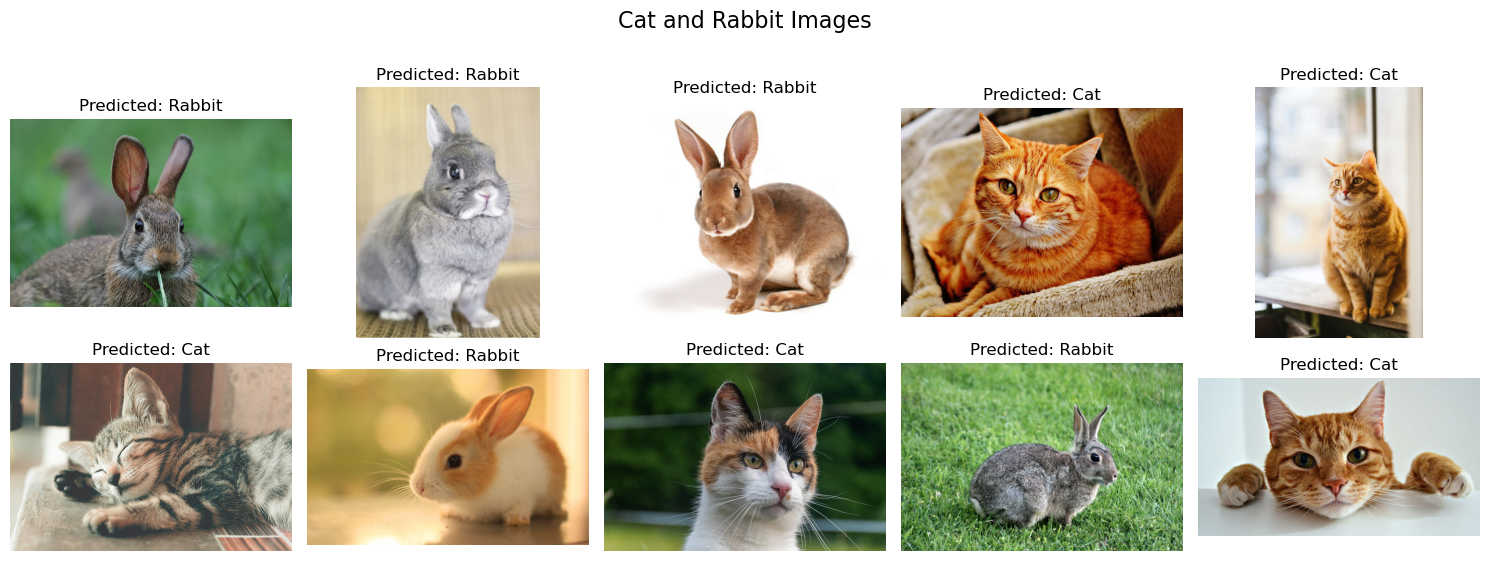

In [32]:
def show_images(model):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle("Cat and Rabbit Images", fontsize=16)
    
    for i, ax in enumerate(axes.flat, start=1):
        img_path = f"D:/Dataset/CatnRabit/show-images/img-{i}.jpg"
        try:
            # Load and preprocess the image
            image = load_img(img_path, target_size=(224, 224))
            image_array = img_to_array(image) / 255.0
            image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

            # Predict the class
            predicted_probabilities = model.predict(image_array)[0]
            predicted_class = np.argmax(predicted_probabilities)

            # Display the image
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(f'Predicted: {classes[predicted_class]}')
            ax.axis("off")
        
        except Exception as e:
            ax.set_title(f"Error {i}")
            ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Call the function with your model
show_images(model)
